<a href="https://colab.research.google.com/github/RobertTunn1983/BigDataAnalytics/blob/main/Final_Version_Coursework%2C_Robert_Tunn%2C_2015065.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Big Data Analysis Coursework**
#**Robert Tunn, 2015065**

<br>
The aim of this coursework is to examine a dataset and thereafter propose a supervised machine learning model which could be used by financial institutions to predict the likelihood of a debtor defaulting on their credit card payments. The dataset used to formulate the model is taken from the online UCI database on the default of Credit Card clients available at:
<br>
<br>

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
<br>
<br>
The dataset has been formatted as a .csv file and uploaded to a public github repository. The Google Colab code runs immediately without uploading a file to the drive. Please note that some of the code relating to the proposed model takes a long time to run thus outputs for these sections are provided as annotations. 
<br>
<br>
The dataset contains information on 30,000 credit card debtors of a Taiwanese financial institution from April 2005 to September 2005. 
<br>
<br>
The 25 variables in the dataset are detailed below. Any monetary amounts are denominated in NT (New Taiwan) dollars.
<br>
<br>

1. **ID**: index value serving as an anonymous ID for the debtor;

<br>

2. **LIMIT_BAL**: total amount of given credit for that debtor including family/supplementary credit;

<br>

3. **SEX**: assignation of gender (1: male, 2: female);

<br>

4. **EDUCATION**: (

>>1: Graduate School;

>>2: University;

>>3: High School;

>>4: Others;

>>5: Unknown;

>>6: Unknown

>);

>Please see notes in project on categories 4-6 of education data.

<br>

5. **MARRIAGE**: Marital status (
  
>>1: Married;

>>2: Single;

>>3: Others

>);

>Please see notes in project on additional categories of marital data.

<br>

6. **PAY_0**: Repayment status in September 2005 (

>>-1: Paid in accordance with agreement;

>>1: Payment delay for one month;

>>2: Payment delay for two months;

>>...and so on...

>>8: Payment delay for eight months;

>>9: Payment delay for nine months and above;

>);

<br>

7. **PAY_2**: Repayment status in August 2005, scale same as PAY_0;

<br>

8. **PAY_3**: Repayment status in July 2005, scale same as PAY_0;

<br>

9. **PAY_4**: Repayment status in June 2005, scale same as PAY_0;

<br>

10. **PAY_5**: Repayment status in May 2005, scale same as PAY_0;

<br>

11. **PAY_6**: Repayment status in April 2005, scale same as PAY_0;

<br>

12. **BILL_AMT1**: Amount of bill statement in September, 2005;

<br>

13. **BILL_AMT2**: Amount of bill statement in August, 2005;

<br>

14. **BILL_AMT3**: Amount of bill statement in July, 2005;

<br>

15. **BILL_AMT4**: Amount of bill statement in June, 2005;

<br>

16. **BILL_AMT5**: Amount of bill statement in May, 2005;

<br>

17. **BILL_AMT6**: Amount of bill statement in April, 2005;

<br>

18. **PAY_AMT1**: Amount of previous payment in September, 2005;

<br>

19. **PAY_AMT2**: Amount of previous payment in August, 2005;

<br>

20. **PAY_AMT3**: Amount of previous payment in July, 2005;

<br>

21. **PAY_AMT4**: Amount of previous payment in June, 2005;

<br>

22. **PAY_AMT5**: Amount of previous payment in May, 2005;

<br>

23. **PAY_AMT6**: Amount of previous payment in April, 2005;

<br>

24. **default.payment.next.month**: Default status of debtor as of October 2005 (1: yes, 2: no)

#**A. Types of variables**

Categoric variables: 
Sex; 
Education (0, 5 and 6 put into 4)
and Marriage (0 put into 3).

Continuous variables:
BILL_AMT(0-6); 
PAY_AMT(0-6); 
AGE and 
LIMIT_BAL.

Discrete variables:
PAY_(0-6) 
Note: it was discovered that there are in fact additional -2 and 0 values which are retained after consideration.

The dependent variable default.payment.next.month is relabelled as "Default_Oct" and denotes whether the bank considered the debtor to be in default as of October 2015.

#**B. Importing libraries and uploading data**

In [95]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from plotnine import *
%matplotlib inline

import graphviz

from imblearn.over_sampling import SMOTE

import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [96]:
#The original dataset from the UCI website is stored in a deprecated .xls format
#The dataset has been saved in .csv format and uploaded to a public repository on github.com
#Considerable issues arose when MS Excel was used for this purpose amongst which was the conversion of all datafields to strings
df_raw = "https://raw.githubusercontent.com/RobertTunn1983/BigDataAnalytics/main/default_of_credit_card_payments.csv"

#Read .csv file and save as a dataframe
df = pd.read_csv(df_raw)

#**C. Take a first glance at the dataset**

In [97]:
#Show top 5 rows
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [98]:
#Display types of data in dataset per column
df.dtypes

#Datatypes are being reported in their true form

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [99]:
#Iterate over entire dataset to make sure that there are no missing values
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [100]:
#Provide statistics on the dataset in tabular form
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


#**D. Tidy up dataset**

In [101]:
#Column naming is awkward, especially "default.payment.next.month"
#This is renamed as "Default_Oct"

df.rename(columns={"default.payment.next.month": "Default_Oct"}, inplace=True)

#Also the ID column is only an index so drop
df.drop('ID', axis = 1, inplace =True)

#Sex and status columns return some meaningless statistics but they could be 
#very important categories

#I also decided to rename the PAY_AMT, BILL_AMT and PAY columns because doing
#so helps explain things better in the next section
#The dataset is clearly poorly presented and it is a challenge just to lay it
#out properly and understand what is going on
#Reminder: PAY appears to concern the debtor's status in terms of how they are 
#managing their payments and at first glance is not a continuous scale

#Make explicitly clear that PAID columns refer to amounts paid for debt accrued
#up to a particular month
#PAID_FOR used as a label
df.rename(columns = {"PAY_AMT6": "PAID_FOR_Mar"}, inplace=True)
df.rename(columns = {"PAY_AMT5": "PAID_FOR_Apr"}, inplace=True)
df.rename(columns = {"PAY_AMT4": "PAID_FOR_May"}, inplace=True)
df.rename(columns = {"PAY_AMT3": "PAID_FOR_Jun"}, inplace=True)
df.rename(columns = {"PAY_AMT2": "PAID_FOR_Jul"}, inplace=True)
df.rename(columns = {"PAY_AMT1": "PAID_FOR_Aug"}, inplace=True)

#Make explicitly clear that BILL columns refer to statement balances issued in a 
#particular month
df.rename(columns = {"BILL_AMT6": "BILL_Apr"}, inplace=True)
df.rename(columns = {"BILL_AMT5": "BILL_May"}, inplace=True)
df.rename(columns = {"BILL_AMT4": "BILL_Jun"}, inplace=True)
df.rename(columns = {"BILL_AMT3": "BILL_Jul"}, inplace=True)
df.rename(columns = {"BILL_AMT2": "BILL_Aug"}, inplace=True)
df.rename(columns = {"BILL_AMT1": "BILL_Sep"}, inplace=True)

#Make explicitly clear that PAY columns refer to repayment status in a 
#particular month
df.rename(columns = {"PAY_6": "status_Apr"}, inplace=True)
df.rename(columns = {"PAY_5": "status_May"}, inplace=True)
df.rename(columns = {"PAY_4": "status_Jun"}, inplace=True)
df.rename(columns = {"PAY_3": "status_Jul"}, inplace=True)
df.rename(columns = {"PAY_2": "status_Aug"}, inplace=True)
df.rename(columns = {"PAY_0": "status_Sep"}, inplace=True)

In [102]:
#Show updated dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
status_Sep,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
status_Aug,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
status_Jul,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
status_Jun,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
status_May,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


#**E. How do the datafields fit together?**

(i) We need to explore the relationship between the amounts owed (BILL), the amounts paid (PAID_FOR) and then work in the status of the debtor so that these figures make sense and are displayed in an easily understood format.

Start by displaying bill amounts and amounts paid by debtor:

In [103]:
df[['PAID_FOR_Mar', 'BILL_Apr', 'PAID_FOR_Apr', 'BILL_May', 'PAID_FOR_May', 'BILL_Jun', 'PAID_FOR_Jun', 'BILL_Jul', 'PAID_FOR_Jul', 'BILL_Aug', 'PAID_FOR_Aug', 'BILL_Sep']].head(15)

,PAID_FOR_Mar,BILL_Apr,PAID_FOR_Apr,BILL_May,PAID_FOR_May,BILL_Jun,PAID_FOR_Jun,BILL_Jul,PAID_FOR_Jul,BILL_Aug,PAID_FOR_Aug,BILL_Sep
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,689.0,689.0,3102.0,0.0,3913.0
1,2000.0,3261.0,0.0,3455.0,1000.0,3272.0,1000.0,2682.0,1000.0,1725.0,0.0,2682.0
2,5000.0,15549.0,1000.0,14948.0,1000.0,14331.0,1000.0,13559.0,1500.0,14027.0,1518.0,29239.0
3,1000.0,29547.0,1069.0,28959.0,1100.0,28314.0,1200.0,49291.0,2019.0,48233.0,2000.0,46990.0
4,679.0,19131.0,689.0,19146.0,9000.0,20940.0,10000.0,35835.0,36681.0,5670.0,2000.0,8617.0
5,800.0,20024.0,1000.0,19619.0,1000.0,19394.0,657.0,57608.0,1815.0,57069.0,2500.0,64400.0
6,13770.0,473944.0,13750.0,483003.0,20239.0,542653.0,38000.0,445007.0,40000.0,412023.0,55000.0,367965.0
7,1542.0,567.0,1687.0,-159.0,581.0,221.0,0.0,601.0,601.0,380.0,380.0,11876.0
8,1000.0,3719.0,1000.0,11793.0,1000.0,12211.0,432.0,12108.0,0.0,14096.0,3329.0,11285.0
9,0.0,13912.0,1122.0,13007.0,13007.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**(ii) Observations**:

Debts accrued by credit card are billed the following month and I have no reason to believe that this is any different in Taiwan. PAID_FOR_Mar is not as useful as other PAID_FOR columns because it must refer to payments made against debt for March. There is no data on this and hence no BILL_Mar column. There is also no PAID_FOR_Sep column meaning that we do not know how well the debtors managed to service their debt for that month. That is disappointing because that would clearly correlate highly to the target variable which indicates whether or not the debtor was considered to be in default in October. 

The dataset appears to be incomplete and when I formulate decision trees (please see part K, below) I look at whether this has any negative bearing on the proposed model, if removing these columns would improve the accuracy of the model or if for the purposes of supervised machine learning this makes any difference.

Row 14: the debtor makes a steady payment of 3000 NT every month yet the amount owed to the bank increases month on month. This increase must be attributed to further spending on the card and interest accrued, the amounts of which are not important to this model but we need to acknowledge that they are there for the numbers to make sense.

For now I will leave in BILL_Sep because it may be relevant to the next stage when I attempt to incorporate status. PAID_FOR_Mar is removed. LIMIT_BAL is introduced as the first column to help make sense of the debtor statuses.




In [104]:
df[['LIMIT_BAL', 'BILL_Apr', 'PAID_FOR_Apr', 'status_Apr', 'BILL_May', 'PAID_FOR_May', 'status_May', 'BILL_Jun', 'PAID_FOR_Jun', 'status_Jun', 'BILL_Jul', 'PAID_FOR_Jul', 'status_Jul', 'BILL_Aug', 'PAID_FOR_Aug', 'status_Aug', 'BILL_Sep', 'status_Sep']].head(25)

,LIMIT_BAL,BILL_Apr,PAID_FOR_Apr,status_Apr,BILL_May,PAID_FOR_May,status_May,BILL_Jun,PAID_FOR_Jun,status_Jun,BILL_Jul,PAID_FOR_Jul,status_Jul,BILL_Aug,PAID_FOR_Aug,status_Aug,BILL_Sep,status_Sep
0,20000.0,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,-1,689.0,689.0,-1,3102.0,0.0,2,3913.0,2
1,120000.0,3261.0,0.0,2,3455.0,1000.0,0,3272.0,1000.0,0,2682.0,1000.0,0,1725.0,0.0,2,2682.0,-1
2,90000.0,15549.0,1000.0,0,14948.0,1000.0,0,14331.0,1000.0,0,13559.0,1500.0,0,14027.0,1518.0,0,29239.0,0
3,50000.0,29547.0,1069.0,0,28959.0,1100.0,0,28314.0,1200.0,0,49291.0,2019.0,0,48233.0,2000.0,0,46990.0,0
4,50000.0,19131.0,689.0,0,19146.0,9000.0,0,20940.0,10000.0,0,35835.0,36681.0,-1,5670.0,2000.0,0,8617.0,-1
5,50000.0,20024.0,1000.0,0,19619.0,1000.0,0,19394.0,657.0,0,57608.0,1815.0,0,57069.0,2500.0,0,64400.0,0
6,500000.0,473944.0,13750.0,0,483003.0,20239.0,0,542653.0,38000.0,0,445007.0,40000.0,0,412023.0,55000.0,0,367965.0,0
7,100000.0,567.0,1687.0,-1,-159.0,581.0,0,221.0,0.0,0,601.0,601.0,-1,380.0,380.0,-1,11876.0,0
8,140000.0,3719.0,1000.0,0,11793.0,1000.0,0,12211.0,432.0,0,12108.0,0.0,2,14096.0,3329.0,0,11285.0,0
9,20000.0,13912.0,1122.0,-1,13007.0,13007.0,-1,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,-2,0.0,-2


**(iii) Further observations**

Row 14 now makes more sense.

(Note: now that the status columns are introduced one is immediately struck by the additional values of -2 and 0 which are not mentioned in the scale that came with the data. I explore this in the next part so please disregard for now).

It is disappointing that there is no PAID_FOR_Sep column because in order to be complete the numerical data comes in sets of three columns. It is fair to say that status_Sep cannot be thoroughly examined without PAID_FOR_Sep.

Row 21: this debtor maintains a status of -1 throughout meaning that the bank considers him to be keeping to the terms of his credit agreement. He pays his balance in full every month and one would assume that that would be the end of the matter as far as status is concerned.

**(iv) -2 and 0 as statuses?**

-2 and 0 are not given as statuses on the scale that came with the data. If -1  signifies that the debtor is keeping to their agreement and 1 and above are said to denote the amount of payment delay in months, what is meant by -2 and 0?

Lets see if we can find more out about -2 by highlighting all -2s in the first 50 entries. BILL_Sep and status_Sep are now dropped for the rest of part E.

In [105]:
df_showMins2s = df[['LIMIT_BAL', 'BILL_Apr', 'PAID_FOR_Apr', 'status_Apr', 'BILL_May', 'PAID_FOR_May', 'status_May', 'BILL_Jun', 'PAID_FOR_Jun', 'status_Jun', 'BILL_Jul', 'PAID_FOR_Jul', 'status_Jul', 'BILL_Aug', 'PAID_FOR_Aug', 'status_Aug']].head(35)

def colour_red(x, props=''):
    return props if x == -2 else None

df_showMins2s.style.applymap(colour_red, props='color:red;')

,LIMIT_BAL,BILL_Apr,PAID_FOR_Apr,status_Apr,BILL_May,PAID_FOR_May,status_May,BILL_Jun,PAID_FOR_Jun,status_Jun,BILL_Jul,PAID_FOR_Jul,status_Jul,BILL_Aug,PAID_FOR_Aug,status_Aug
0,20000.000000,0.000000,0.000000,-2,0.000000,0.000000,-2,0.000000,0.000000,-1,689.000000,689.000000,-1,3102.000000,0.000000,2
1,120000.000000,3261.000000,0.000000,2,3455.000000,1000.000000,0,3272.000000,1000.000000,0,2682.000000,1000.000000,0,1725.000000,0.000000,2
2,90000.000000,15549.000000,1000.000000,0,14948.000000,1000.000000,0,14331.000000,1000.000000,0,13559.000000,1500.000000,0,14027.000000,1518.000000,0
3,50000.000000,29547.000000,1069.000000,0,28959.000000,1100.000000,0,28314.000000,1200.000000,0,49291.000000,2019.000000,0,48233.000000,2000.000000,0
4,50000.000000,19131.000000,689.000000,0,19146.000000,9000.000000,0,20940.000000,10000.000000,0,35835.000000,36681.000000,-1,5670.000000,2000.000000,0
5,50000.000000,20024.000000,1000.000000,0,19619.000000,1000.000000,0,19394.000000,657.000000,0,57608.000000,1815.000000,0,57069.000000,2500.000000,0
6,500000.000000,473944.000000,13750.000000,0,483003.000000,20239.000000,0,542653.000000,38000.000000,0,445007.000000,40000.000000,0,412023.000000,55000.000000,0
7,100000.000000,567.000000,1687.000000,-1,-159.000000,581.000000,0,221.000000,0.000000,0,601.000000,601.000000,-1,380.000000,380.000000,-1
8,140000.000000,3719.000000,1000.000000,0,11793.000000,1000.000000,0,12211.000000,432.000000,0,12108.000000,0.000000,2,14096.000000,3329.000000,0
9,20000.000000,13912.000000,1122.000000,-1,13007.000000,13007.000000,-1,0.000000,0.000000,-2,0.000000,0.000000,-2,0.000000,0.000000,-2


We have already looked at debtor 21 where a status of -1 was maintained throughout. How then do we explain the continuous -2 status asssigned to debtor 23? Two distinguishing features are that debtor 23 is well below their credit limit and in the final month pays off slightly more than they were due. Then again debtor 21 is also well below their credit limit.

Row 33 gives data on a debtor who initially did not pay off their entire balance but thereafter did so and they retain a status of -2 throughout. It could be that they paid off their entire balance several times over that month, we simply don't have the data to say. Their payment for July was sightly higher than was owed and they appear to be keeping well below their credit limit at all times.

People with a -2 status must be some form of low or very low risk debtor from the bank's point of view, the status is not just about making payments on time. It is tempting to put all -2s into the the -1 category of keeping to the agreement but clearly the bank sees some merit in having a -2 status.

Also, it is important to bear in mind, as we have with debtor 33 that there is potentially payment activity that we do not see. In this regard debtor 0 is a good example whereby the debtor does not use their card for three months and their status declines from a -2 to a -1. Did he go over his credit limit for a few days? We simply do not know.

Now the 0 values are highlighted.

In [118]:
df_showZeros = df[['LIMIT_BAL', 'BILL_Apr', 'PAID_FOR_Apr', 'status_Apr', 'BILL_May', 'PAID_FOR_May', 'status_May', 'BILL_Jun', 'PAID_FOR_Jun', 'status_Jun', 'BILL_Jul', 'PAID_FOR_Jul', 'status_Jul', 'BILL_Aug', 'PAID_FOR_Aug', 'status_Aug']].head(50)

def colour_red(x, props=''):
  return props if x == 0 else None

df_showZeros.style.applymap(colour_red, props='color:red;')



,LIMIT_BAL,BILL_Apr,PAID_FOR_Apr,status_Apr,BILL_May,PAID_FOR_May,status_May,BILL_Jun,PAID_FOR_Jun,status_Jun,BILL_Jul,PAID_FOR_Jul,status_Jul,BILL_Aug,PAID_FOR_Aug,status_Aug
0,20000.000000,0.000000,0.000000,-2,0.000000,0.000000,-2,0.000000,0.000000,-1,689.000000,689.000000,-1,3102.000000,0.000000,2
1,120000.000000,3261.000000,0.000000,2,3455.000000,1000.000000,0,3272.000000,1000.000000,0,2682.000000,1000.000000,0,1725.000000,0.000000,2
2,90000.000000,15549.000000,1000.000000,0,14948.000000,1000.000000,0,14331.000000,1000.000000,0,13559.000000,1500.000000,0,14027.000000,1518.000000,0
3,50000.000000,29547.000000,1069.000000,0,28959.000000,1100.000000,0,28314.000000,1200.000000,0,49291.000000,2019.000000,0,48233.000000,2000.000000,0
4,50000.000000,19131.000000,689.000000,0,19146.000000,9000.000000,0,20940.000000,10000.000000,0,35835.000000,36681.000000,-1,5670.000000,2000.000000,0
5,50000.000000,20024.000000,1000.000000,0,19619.000000,1000.000000,0,19394.000000,657.000000,0,57608.000000,1815.000000,0,57069.000000,2500.000000,0
6,500000.000000,473944.000000,13750.000000,0,483003.000000,20239.000000,0,542653.000000,38000.000000,0,445007.000000,40000.000000,0,412023.000000,55000.000000,0
7,100000.000000,567.000000,1687.000000,-1,-159.000000,581.000000,0,221.000000,0.000000,0,601.000000,601.000000,-1,380.000000,380.000000,-1
8,140000.000000,3719.000000,1000.000000,0,11793.000000,1000.000000,0,12211.000000,432.000000,0,12108.000000,0.000000,2,14096.000000,3329.000000,0
9,20000.000000,13912.000000,1122.000000,-1,13007.000000,13007.000000,-1,0.000000,0.000000,-2,0.000000,0.000000,-2,0.000000,0.000000,-2


Row 49 is interesting. The amount owed by this debtor is slightly above their agreed spending limit in April and May however they manage to bring their debt down. Interestingly they retain a 0 status after appearing to remain below their spending limit for three months thereafter. It could be that people above or close to their limit receive a 0 status or maybe their payments did not meet the minimum amount. We are not party to the fine details of how the Taiwanese bank assigns a status and it is inappropriate to speculate.

Having explored -2, -1 and 0 as debtor statuses the remainder (1 and above for every month in default) should be self explanatory. However, as with debtor 49, there is clearly some hangover whereby the statuses for previous months are taken into account. It is a fair assumption that once a debtor loses a status as a sound debtor it takes some time to get back to good standing again.

For this section I conclude that it is inappropriate to assign too much meaning to the statuses of the debtors but nevertheless this category is there for a good reason. Intially I had the impression that status was not a continuous scale but on further inspection it turns out that it is and is more useful than first appeared. It is common knowledge that in their assessment of credit worthiness banks make use of data from other financial institutions in the form of credit checks, however, there is no mention of any having been used by the Taiwanese bank in its calculation of status. This discussion is only to demonstrate that the data has been critically analysed and not simply thrown into a decision tree training algorithm with no thought given to what it actually means. In my heat map and with the training and improvement of the model below I feed in data from all columns, even those that were disregarded for this section, to ensure that no possible correlations have been missed.

**(v) Non peer reviewed source of information:**

Even though quoting from a non-published and non peer reviewed source is dangerous, the following link purports to show an E-mail from the publisher of the data:

https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset/discussion/34608

If true it is a pity that a better job was not done when the data was presented on the UCI database website. Nevertheless the comment appears to square reasonably well with my independent conclusions on the meaning of the statuses and it does not affect the manner in which I handle the data in my proposed model. 

Also worthy of note is that the default.next.month variable appears to indicate whether or not the debtor was in default as of October 2005 which agrees with my assessment. However the lack of guidance on what a debtor must do to enter into default is absent. 

#**F. First observations: What is the prima facia risk of default? Is the data balanced?**

**(i) What is the risk of a debtor defaulting? Simple number of debtors/ number of defaults**

In [13]:
#This is simply the mean value in the Default column (0.221200*100) or can be manually calculated as:

(df.Default_Oct.sum() / len(df.Default_Oct))*100

22.12

i.e. there is a 22.12% probability that a debtor will default irrespective of any further consideration e.g. sex, age, education etc. Probability of a debtor not defaulting is therefore (100-22.12) = 77.88%

**(ii) Is the dataset balanced?**

In [14]:
#Is the dataset balanced?
#i.e does the dataframe include an equal number of defaulting and non-defaulting
#debtors?
df['Default_Oct'].value_counts()

0    23364
1     6636
Name: Default_Oct, dtype: int64

Obviously the number of defaulting and non-defaulting debtors are not in equal 
proportion. This means that the dataset is imbalanced. The Default_Oct column will be up-sampled using the SMOTE (Synthetic Minority Oversampling Technique) algorithm prior to creating a decision tree in Part K, below.

#**G. Distribution of values within categorical variables - sex, marital status, education**

**(i) Sex**

In [129]:
#Take a look at distibution of sex
#Note (male:1, female:2)
df['SEX'].value_counts()

#There are significantly more females than males in the dataset

2    18112
1    11888
Name: SEX, dtype: int64

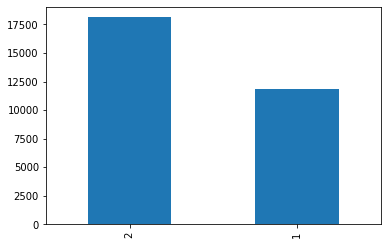

In [130]:
#Plot chart
df['SEX'].value_counts().plot(kind = 'bar')

**(ii) Marital Status**

In [131]:
#Distribution according to marital status
#Note: according to categories provided with data (1: married, 2: single, 3: others)
df['MARRIAGE'].value_counts(ascending=True)

3      377
1    13659
2    15964
Name: MARRIAGE, dtype: int64

We have an obvious problem here i.e. what sort of marital arrangement is represented by category 0 containing 54 debtors? Why is info on this group not provided with the data? Are they man and wife living apart? Are they cohabitees? Are they something else? We could delete them but owing to their small number I prefer to place them together and label them as others which appears to be a catch all for anything not traditionally married or single.

In [132]:
#Put 0 into 3
df['MARRIAGE'] = np.where(df['MARRIAGE'] == 0, 3, df['MARRIAGE'])

In [133]:
#And check that this has worked
#Distribution according to marital status
df['MARRIAGE'].value_counts(ascending=True)

3      377
1    13659
2    15964
Name: MARRIAGE, dtype: int64

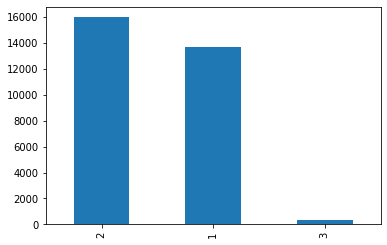

In [134]:
#Show graph of updated values
df['MARRIAGE'].value_counts().plot(kind = 'bar')

**(iii) Highest Level of Education**

In [135]:
#Distribution according to highest level of educational attainment
#Note: (1: graduate school, 2: university, 3: high School, 4: others, 5: unknown, 6: unknown)
df['EDUCATION'].value_counts(ascending=True)

4      468
3     4917
1    10585
2    14030
Name: EDUCATION, dtype: int64

We have a similar problem here to marital status: categories 5, 4 and 6 are labelled either "Others" or "Unknown". Category 0 is not mentioned on the scale that came with the data and is thus yet another "unknown". Categories 1, 2 and 3 represent standard levels of educational achievement e.g. University graduate so "others" implies that their level of education is not on the list whereas "Unknown" means that there is no knowledge of this. It could be that some debtors have little or no education at all. Owing to the small numbers involved I have decided to put categories 5, 4, 6 and 0 into 4 as "Others".

In [136]:
#Put 0, 5 and 6 into 4
df['EDUCATION'] = np.where(df['EDUCATION'] == 0, 4, df['EDUCATION'])
df['EDUCATION'] = np.where(df['EDUCATION'] == 5, 4, df['EDUCATION'])
df['EDUCATION'] = np.where(df['EDUCATION'] == 6, 4, df['EDUCATION'])


In [137]:
#Show updated counts to check that code has worked
df['EDUCATION'].value_counts(ascending=True)

4      468
3     4917
1    10585
2    14030
Name: EDUCATION, dtype: int64

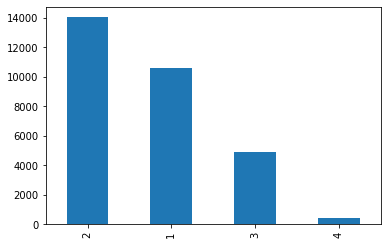

In [138]:
#Show chart, just for the sake of completeness
df['EDUCATION'].value_counts().plot(kind = 'bar')

#**H. Distribution of values within numerical variables - bill statement, amount paid towards bill and debtor status**

Histograms are created in order to give a feel for the distribution of the numerical variables and to look for any obvious outliers.

As with categorical variables above, some recategorisation is required.

**(i) Amount of bill statement**

In [139]:
#Create function for displaying histograms
def display_hist(df, variables, n_rows, n_cols, n_bins):
    fig = plt.figure()
    for i, var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins = n_bins, ax = ax)
        ax.set_title(var_name)
    fig.tight_layout()
    plt.show()

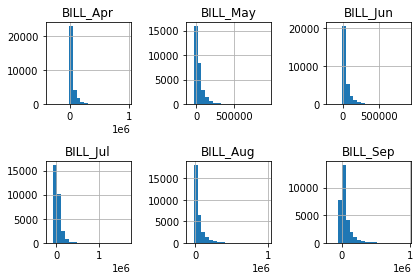

In [140]:
#Display histogram for BILL variables
bill_amounts = df[['BILL_Apr', 'BILL_May', 'BILL_Jun', 'BILL_Jul', 'BILL_Aug', 'BILL_Sep',]]
display_hist(bill_amounts, bill_amounts.columns, 2, 3, 20)

There appears to be nothing particularly noteworthy in these histograms. In September the people with the highest level of debt take second position but we do not have any knowledge on why this should be the case. 

**(ii) Amount paid towards previous statement**

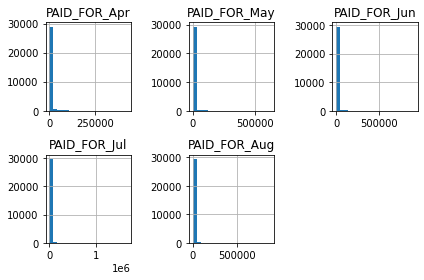

In [141]:
#Display histogram for PAID_FOR variables
prevStatement_amounts = df[['PAID_FOR_Apr','PAID_FOR_May', 'PAID_FOR_Jun', 'PAID_FOR_Jul', 'PAID_FOR_Aug']]
display_hist(prevStatement_amounts, prevStatement_amounts.columns, 2, 3, 20)

The level of payments being made against debt appear to be consistent.

**(iii) Repayment status**

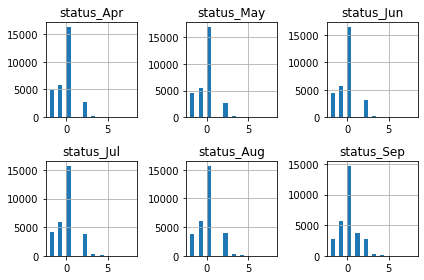

In [142]:
#Display histogram for status variables
repStatus = df[['status_Apr','status_May', 'status_Jun', 'status_Jul', 'status_Aug', 'status_Sep']]
display_hist(repStatus, repStatus.columns, 2, 3, 20)

Interestingly, despite the uncertaintly as to how the bank goes about assigning the status of its debtors, it appears that it does so consistently. It could be noted that there are is a large increase of debtors given a status of 1 in September.

**Note: is there something about September?**

The data relating to September has already been controversial. We have seen that it is incomplete and that there is an increase in the average level of debt and a decrease in the average status level for that month. In the UK credit card debt increases at Christmas and New Year because debtors go on spending sprees, is there a similar Taiwanese phenonemon? This is unknown to the author but witout further clarification this undermines the [transportation and] usefulness of the data. 

**(iv) Age**

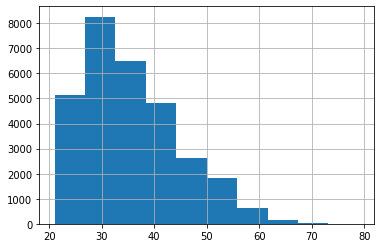

In [143]:
#Use simple .hist function 
df.AGE.hist()

Nothing particularly noteworthy.

**Total amount of given credit -  this is a rubbish depiction**

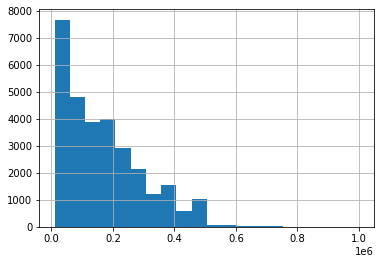

In [144]:
#Use simple .hist function 
df.LIMIT_BAL.hist(bins = 20)

Nothing particularly noteworthy.

#**I. Correlations with the target variable**

**(i) Probability of default based on debtor's sex**

In [145]:
#Prob of default v sex, make into dataset
defaultProbBySex = df.groupby(['SEX', 'Default_Oct']).size().unstack(1)

In [146]:
#Show dataset
defaultProbBySex

Default_Oct,0,1
SEX,,
1,9015,2873
2,14349,3763


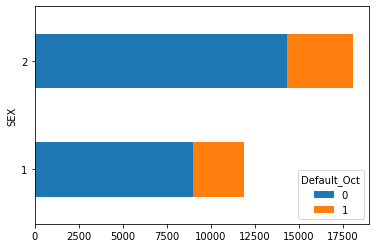

In [147]:
#Provide a graphical representation
defaultProbBySex.plot(kind='barh', stacked = True)

#Reminder SEX: (1: male, 2: female), Default: (0: no, 1: yes)

In [148]:
#Add another column to defaultProbBySex dataset to show percentages
defaultProbBySex['prob (%)'] = (defaultProbBySex[1]/(defaultProbBySex[0] + defaultProbBySex[1]))*100 

In [149]:
#Show updated dataset
defaultProbBySex

Default_Oct,0,1,prob (%)
SEX,,,
1,9015,2873,24.167227
2,14349,3763,20.776281


If we recall from above that the overall probablity of a debtor defaulting irrespective of their sex is 22.12%, that sits well with the two figures for males and females respectively.

We also see that even though there is a smaller representation of males in the data we can discern that the probability of a default is slightly higher if the debtor is male.

**(ii) Probability of default based on debtor's educational level**

In [150]:
#Prob of default v educational level, make into dataset
#Reminder EDUCATION: (1: graduate school, 2: university, 3: high school, 4: others), Default: (0: no, 1: yes)
defaultProbByEdLevel = df.groupby(['EDUCATION', 'Default_Oct']).size().unstack(1)

In [151]:
#Show dataset
defaultProbByEdLevel

Default_Oct,0,1
EDUCATION,,
1,8549,2036
2,10700,3330
3,3680,1237
4,435,33


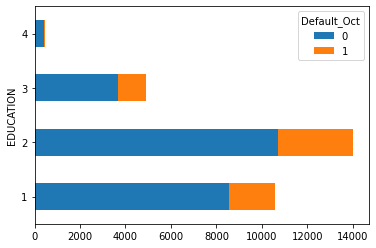

In [152]:
#Provide a graphical representation
defaultProbByEdLevel.plot(kind='barh', stacked = True)

In [153]:
#Add another column to defaultProbByEdLevel dataset to show percentages
defaultProbByEdLevel['prob (%)'] = (defaultProbByEdLevel[1]/(defaultProbByEdLevel[0] + defaultProbByEdLevel[1]))*100 

In [154]:
#Show updated dataset
defaultProbByEdLevel

Default_Oct,0,1,prob (%)
EDUCATION,,,
1,8549,2036,19.234766
2,10700,3330,23.734854
3,3680,1237,25.157616
4,435,33,7.051282


Interestingly people who attended graduate school have a lower chance of defaulting than university graduates. However, people with only high school or "other" level of education are more likely to default than university graduates. A higher level of education does not always correspond with a lower chance of defaulting.

**(iii) Probability of default based on debtor's marital status**

In [155]:
#Prob of default v marital status, make into dataset
#Note: marital status (1: married, 2: single, 3: others), Default: (0: no, 1: yes)
defaultProbByMaritalStatus = df.groupby(['MARRIAGE', 'Default_Oct']).size().unstack(1)

In [156]:
#Show dataset
defaultProbByMaritalStatus

Default_Oct,0,1
MARRIAGE,,
1,10453,3206
2,12623,3341
3,288,89


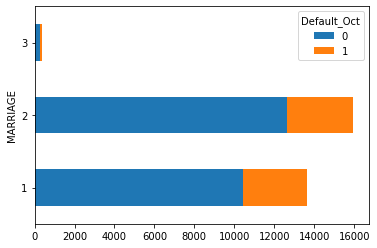

In [157]:
#Provide a graphical representation
defaultProbByMaritalStatus.plot(kind='barh', stacked = True)

In [158]:
#Add another column to defaultProbByMaritalStatus dataset to show percentages
defaultProbByMaritalStatus['prob (%)'] = (defaultProbByMaritalStatus[1]/(defaultProbByMaritalStatus[0] + defaultProbByMaritalStatus[1]))*100 

In [159]:
#Show updated dataset
defaultProbByMaritalStatus

Default_Oct,0,1,prob (%)
MARRIAGE,,,
1,10453,3206,23.471704
2,12623,3341,20.928339
3,288,89,23.607427


It may seem surprising but married people are more likely to default than people in the "others" category. It is a pity that a further breakdown is unavailable for the "others" category which comes in at the highest percentage of all for defaulting. This group is an accumulation of three groups about whom we only know that they are neither married or unmarried in the traditional sense.

#**J. Are there any hidden correlations? - HEAT MAP**

A heat map will now be created for an overview and to search for any hidden correlations.

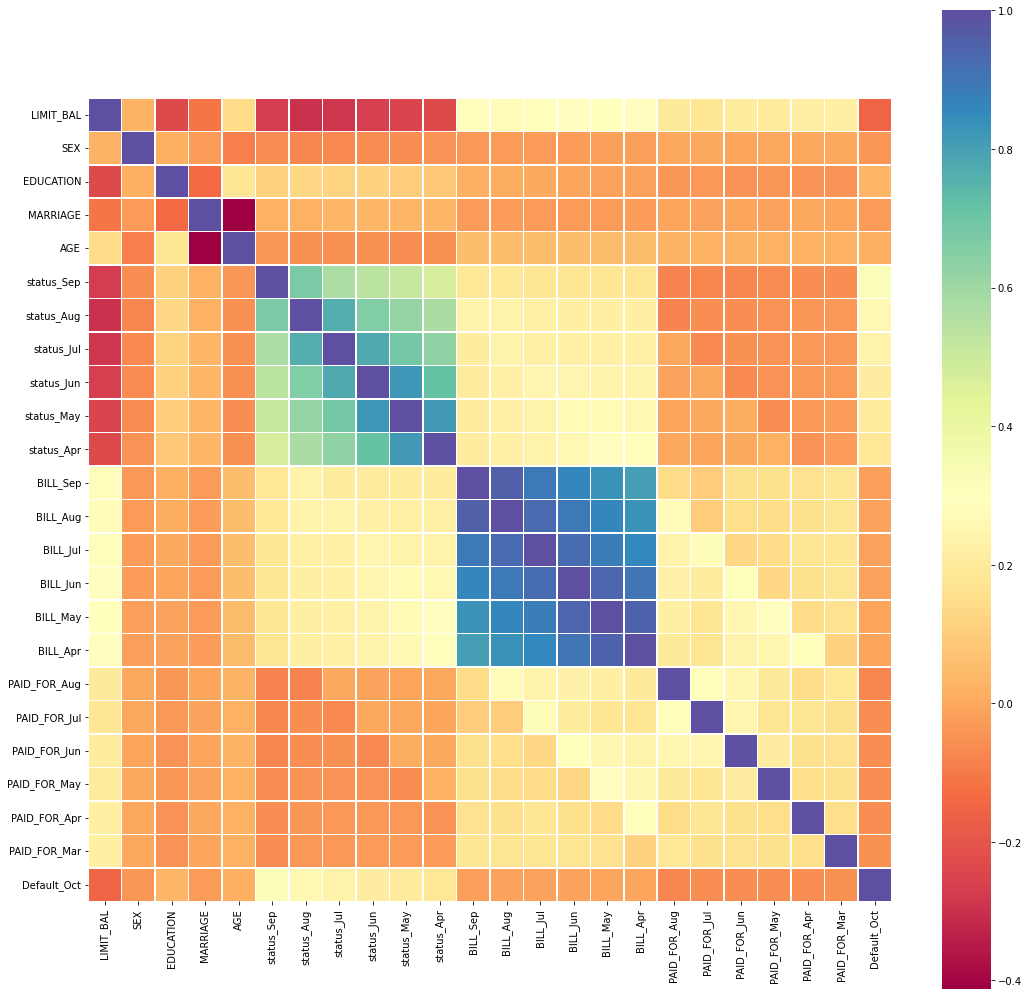

In [46]:
#Correlation matrix according to Pearson's function
corr = df.corr() 
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="Spectral", linewidths=.5, ax=ax)

The column relating to the dependent variable Default_Oct is most relevant and the debtor status for the last month of data (September) has the highest correlation. As the timeline tends towards September the positive correlation between status and default increases. This is a good reason why data relating to the status of the debtor for September should remain within the model despite the data for September being incomplete (please see section XXX, above) and the ambiguity over how a status is assigned by the bank.

The highest negative correlation with Default_Oct occurs with credit limit, indicating that customers with lower limits are more likely to default and vice versa. This is to be expected as banks lend more to those whom they deem to be a low risk of default. Also, higher credit limits clearly correspond with a superior status of debtor bearing in mind that a lower status indicates a superior debtor (-2 being the best). This is a good reason for the retention of categories -2 and 0 as discussed above at section XXXX.

The categorical and numerical variables are found to have little correlation or relevance to the Default. The correlations are not obvious given the arbitrary numbering of the categories. We can see e.g. that generally speaking the higher educational level of the debtor the higher the credit level of the debtor,  given that graduate school is 1 and university is 2 on the scale relating to educational level.

#**K. Supervised machine learning model - decision tree with random forest**

**Start creating a decision tree**

In the first attempt I set up the code and make a guess with the configuration.

In [47]:
#Define Default column of dataframe (target variable) as y
#Note: this does not change 
y = df['Default_Oct'].copy()

In [49]:
#Take the entire dataset except dependant variable and input as features into the decision tree
nonTarget = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'status_Sep', 'status_Aug',
              'status_Jul', 'status_Jun', 'status_May', 'status_Apr', 'BILL_Sep', 'BILL_Aug',
              'BILL_Jul', 'BILL_Jun', 'BILL_May', 'BILL_Apr', 'PAID_FOR_Aug',
              'PAID_FOR_Jul', 'PAID_FOR_Jun', 'PAID_FOR_May', 'PAID_FOR_Apr', 'PAID_FOR_Mar']

X = df[nonTarget].copy()

#Print out non-dependant variable columns to ensure code has worked

#X.columns

In [160]:
#Use SMOTE to address imbalanced data issue
#Note: this made no difference to the decision tree accuracy_score
os = SMOTE(random_state = 42)

columns = X.columns

os_data_X, os_data_y = os.fit_resample(X, y)

os_data_X = pd.DataFrame(data=os_data_X,columns=columns )

os_data_y= pd.DataFrame(data=os_data_y,columns = ['Default_Oct'])

#This doesn't actually make any difference but needed to be addressed for completeness

In [55]:
#Use sklearn train_test_split 

#Separate dataset into train and test sub-sets
#Do not allow algorithm to "see" test data whilst training
#Decision tree algorithm will train on 90% of the data and test or make predictions on leftover 10% (10% is 3000 debtors)
#random_state = 42 ensures same train and test sets across different executions
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, random_state = 42, shuffle=True)

In [58]:
#Create and train TREE_ATTEMPT_1
#Use DecisionTreeClassified

treeAttempt1 = DecisionTreeClassifier(max_depth = 4, random_state = 42) 
treeAttempt1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [59]:
#Display predictions on the test
predictions = treeAttempt1.predict(X_test)

#Display how accurate the predictions were
print(accuracy_score(y_true = y_test, y_pred = predictions)*100)

82.13333333333334


Just over 82.1% seems to be a good score for a first configuration. Can it be improved upon? It appears that this is a good score when work published online is compared (see e.g. Saari at https://github.com/mirandasaari1/Predicting-Credit-Card-Default/blob/master/Project_1.ipynb which I discuss further at Part I, below).

Note: training on a mere 10% of data yielded around 81.56% for an accuracy score.

**Random forest**

Introduce random forest machine learning algorithm for 100 trees.

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

print("\nAccuracy on test set: {:.3f}".format(rf.score(X_test, y_test))*100)


Accuracy on test set: 0.817
Accuracy on test set: 0.817
Accuracy on test set: 0.817
Accuracy on test set: 0.817
Accuracy on test set: 0.817
Accuracy on test set: 0.817
Accuracy on test set: 0.817
Accuracy on test set: 0.817
Accuracy on test set: 0.817
Accuracy on test set: 0.817
Accuracy on test set: 0.817
Accuracy on test set: 0.817
Accuracy on test set: 0.817
Accuracy on test set: 0.817
Accuracy on test set: 0.817
Accuracy on test set: 0.817
Accuracy on test set: 0.817
Accuracy on test set: 0.817
Accuracy on test set: 0.817
Accuracy on test set: 0.817
Accuracy on test set: 0.817
Accuracy on test set: 0.817
Accuracy on test set: 0.817
Accuracy on test set: 0.817
Accuracy on test set: 0.817
Accuracy on test set: 0.817
Accuracy on test set: 0.817
Accuracy on test set: 0.817
Accuracy on test set: 0.817
Accuracy on test set: 0.817
Accuracy on test set: 0.817
Accuracy on test set: 0.817
Accuracy on test set: 0.817
Accuracy on test set: 0.817
Accuracy on test set: 0.817
Accuracy on test se

**This is not an improvement, can grid_tree.fit() do any better?**

In [78]:
#Create param_grid
param_grid = {'max_depth'       : np.arange(1, 12),
             'criterion'        : ['gini', 'entropy'],
             'max_leaf_nodes'   : [5, 10, 20, 100],
             'min_samples_split': [2, 5, 10, 20]}

#Use gridsearchcv 
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'accuracy')

In [62]:
#This takes a long time to run, output will be:
#Sklearn determines the optimum configuration for the decision tree to be:
#DecisionTreeClassifier(max_depth=6, max_leaf_nodes=20)
#This configuration gives an accuracy of:
#82.14814814814815

#Allow the algorithm to determine the parameters giving the best predictions
grid_tree.fit(X_train, y_train)

#Display best parameters and score achieved
print("Sklearn determines the optimum configuration for the decision tree to be:")
print(grid_tree.best_estimator_)
print("This configuration gives an accuracy of:")
print(np.abs(grid_tree.best_score_)*100)

Sklearn determines the optimum configuration for the decision tree to be:
DecisionTreeClassifier(max_depth=6, max_leaf_nodes=20)
This configuration gives an accuracy of:
82.14814814814815


Create second attempt at a decision tree based on optimum configuration and see how accurate it is:

In [63]:
#TREE_ATTEMPT_2

treeAttempt2 = DecisionTreeClassifier(max_depth = 6, max_leaf_nodes = 20) 
treeAttempt2.fit(X_train, y_train)

#Display predictions on the test
predictions2 = treeAttempt2.predict(X_test)

#Display how accurate the predictions were
print(accuracy_score(y_true = y_test, y_pred = predictions2)*100)

#Print out parameters for TREE_ATTEMPT_2
print(".................")
treeAttempt2.get_params()

81.93333333333334
.................


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': 20,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

That also fails to be an improvement. Can KFold be used to investigate highest possible accuracy across several train and data sets for both trees created thus far?

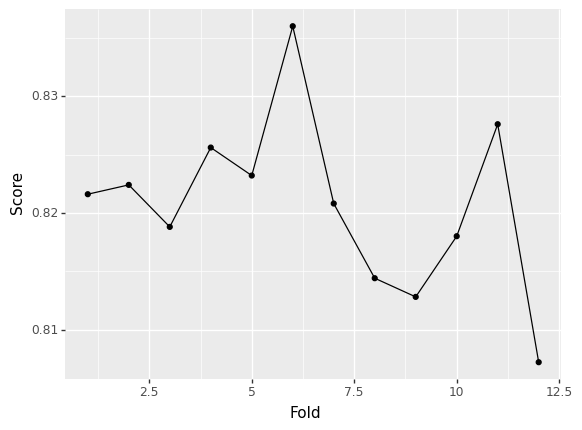

<ggplot: (8747849467173)>

In [64]:
from sklearn.model_selection import KFold

#TREE_ATTEMPT_1

kf = KFold(n_splits = 12, random_state = 42, shuffle = True)

fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(df)):

    training = df.iloc[train_index,:]

    valid = df.iloc[test_index,:]

    feats = training[nonTarget]

    label = training['Default_Oct']

    valid_feats = valid[nonTarget]

    valid_label = valid['Default_Oct']

    treeAttempt1.fit(feats,label)

    pred = treeAttempt1.predict(valid_feats)

    score = accuracy_score(y_true = valid_label, y_pred = pred)

    fold.append(i+1)

    scr.append(score)
    
performance = pd.DataFrame({'Score':scr,'Fold':fold})

g = ggplot(performance,aes(x='Fold',y='Score')) + geom_point() + geom_line()

display(g)

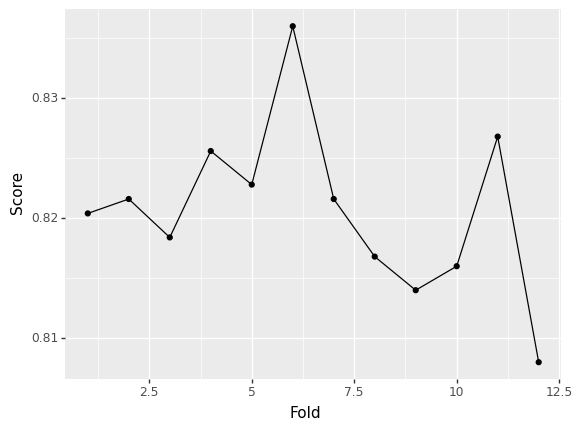

<ggplot: (8747852339965)>

In [65]:
#TREE_ATTEMPT_2

kf = KFold(n_splits = 12, random_state = 42, shuffle = True)

fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(df)):

    training = df.iloc[train_index,:]

    valid = df.iloc[test_index,:]

    feats = training[nonTarget]

    label = training['Default_Oct']

    valid_feats = valid[nonTarget]

    valid_label = valid['Default_Oct']

    treeAttempt2.fit(feats,label)

    pred = treeAttempt2.predict(valid_feats)

    score = accuracy_score(y_true = valid_label, y_pred = pred)

    fold.append(i+1)

    scr.append(score)
    
performance = pd.DataFrame({'Score':scr,'Fold':fold})

g = ggplot(performance,aes(x='Fold',y='Score')) + geom_point() + geom_line()

display(g)

Tree attempt 2 has a highest possible accuracy of just over 83.5% which is a mild improvement on tree attempt 1 but nevertheless shows that supervised machine learning has had a positive effect on the model.

In [66]:
#Have another look at correlation using a function
#TREE_ATTEMPT_1
def get_feature_importance(clsf, ftrs):

    imp = clsf.feature_importances_.tolist()

    feat = ftrs

    result = pd.DataFrame({'column':feat,'relevance_score':imp})

    result = result.sort_values(by = ['relevance_score'], ascending = False)

    return result

get_feature_importance(treeAttempt1, nonTarget)

,column,relevance_score
5,status_Sep,0.732047
6,status_Aug,0.141285
19,PAID_FOR_Jun,0.047981
11,BILL_Sep,0.024420
9,status_May,0.020485
10,status_Apr,0.020305
0,LIMIT_BAL,0.004773
2,EDUCATION,0.003191
18,PAID_FOR_Jul,0.002362
16,BILL_Apr,0.002234


We discover that in the TREE_ATTEMPT_1 model the status of the debtor has by far and away the most relevance to whether or not the debtor will default. However, looking back to the heat map, the debtor status during other months is significantly
 understated. 

In [67]:
#TREE_ATTEMPT_2
def get_feature_importance(clsf, ftrs):

    imp = clsf.feature_importances_.tolist()

    feat = ftrs

    result = pd.DataFrame({'column':feat,'relevance_score':imp})

    result = result.sort_values(by = ['relevance_score'], ascending = False)

    return result

get_feature_importance(treeAttempt2, nonTarget)

,column,relevance_score
5,status_Sep,0.703244
6,status_Aug,0.135727
19,PAID_FOR_Jun,0.046267
11,BILL_Sep,0.026701
0,LIMIT_BAL,0.021007
9,status_May,0.019679
10,status_Apr,0.019506
7,status_Jul,0.009072
8,status_Jun,0.006610
20,PAID_FOR_May,0.004627


There is no real improvement here with TREE_ATTEMPT_2.

The categorical variables once again are considered to be the least relevant.

If comparison is limited to only status_Sep and Default columns, is accuracy improved?

In [77]:
#TREE_ATTEMPT_3
#Run same training model but limit X to status_Sep column 
#Note: y still equals df['Default'].copy() i.e. Default column only
#TREE_ATTEMPT_2
treeAttempt3 = DecisionTreeClassifier(max_depth = 6, max_leaf_nodes = 20) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

treeAttempt3.fit(X_train, y_train)

predictions3 = treeAttempt1.predict(X_test)

print(accuracy_score(y_true = y_test, y_pred = predictions3)*100)

81.93333333333334


No, it isn't. Beating the first attempt at 82.1% still remains to be done. How about using only columns that fit together in a tidily arranged but smaller dataframe as of XXX, above?

In [69]:
#TREE_ATTEMPT_4
#Run same training model but remove all variables deemed to be meaningless in section XXX, above
#Note: y still equals df['Default'].copy() i.e. Default column only

abbrevList = ['LIMIT_BAL', 'BILL_Apr', 'PAID_FOR_Apr', 'status_Apr', 'BILL_May', 'PAID_FOR_May',
              'status_May', 'BILL_Jun', 'PAID_FOR_Jun', 'status_Jun', 'BILL_Jul', 'PAID_FOR_Jul',
              'status_Jul', 'BILL_Aug', 'PAID_FOR_Aug', 'status_Aug']

X = df[abbrevList].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, random_state = 42, shuffle=True)

treeAttempt4 = DecisionTreeClassifier(max_depth = 4, random_state = 42) 

treeAttempt4.fit(X_train, y_train)


predictions = treeAttempt4.predict(X_test)

print(accuracy_score(y_true = y_test, y_pred = predictions)*100)

79.73333333333333


A slight decrease in accuracy, again a pity that a full set of data for BILL_Sep, PAID_FOR_Sep and status_Sep is not available. Tree attempt 1 remains the most accurate.

**Graphical representation of tree attempt 1**

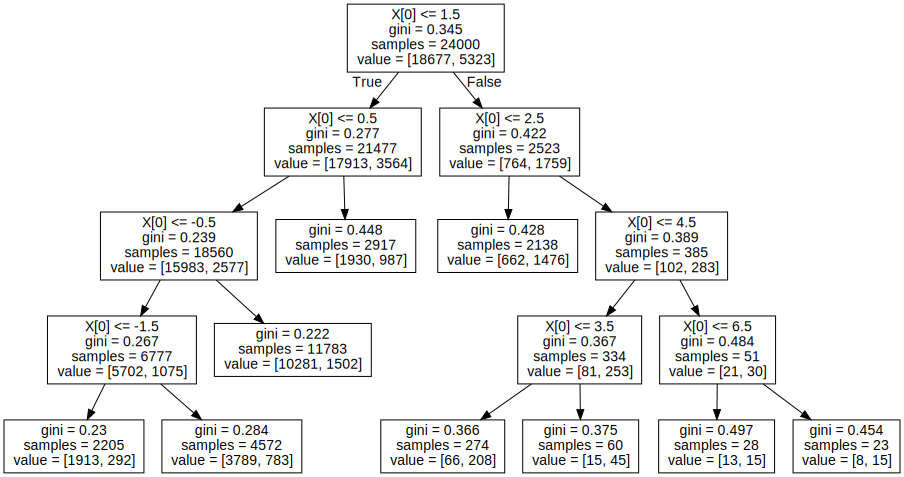

In [71]:
#Import graphviz and visualise TREE_ATTEMPT_1
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(treeAttempt1, out_file=None)  
graph = graphviz.Source(dot_data)  
graph


**Harmonic mean**

Can we get another determination of accuracy by using f1 score to calculate harmonic mean?

In [82]:
#TREE_ATTEMPT_1 calculate harmonic mean USING f1 SCORE

predictions = treeAttempt1.predict(X_test)
f1_score(y_true = y_test, y_pred = predictions)

NameError: ignored

In [73]:
#TREE_ATTEMPT_2 calculate harmonic mean USING f1 SCORE

predictions = treeAttempt2.predict(X_test)
f1_score(y_true = y_test, y_pred = predictions)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- AGE
- BILL_Sep
- EDUCATION
- MARRIAGE
- PAID_FOR_Mar
- ...



ValueError: ignored

Tree attempt 2 has a higher harmonic mean i.e. the predictions provided by the model have a greater degree of precision.

#**I. Conclusion and review of paper**

There are a great deal of attempts at solving this problem online. It appears that an accuracy score of around 82% is the best that can be achieved with supervised machine learning models. After much prodding and poking Saari managed a top accuracy score of 82%. Regrettably this is not an impressive figure and I direct the same criticism towards my own results.

Accuracy score says nothing about the quality of the model. In this regard, bear in mind that 77.88% of debtors do not default (see F(i), above). If I changed all values in the Default_Oct to a 0, I would be 78.88% accurate. This is a better figure and a stinging criticism of many machine learning models that I have seen online.

I note that a large amount of work published online, including Saari, make an inadequate effort to understand the nature of the data before and how it fits together before using MLAs. I beileve the stepstaken by me make my work preferable regardless of a similar result in terms of accuracy.

I extend my criticisms to the publisher of the material who, as I have stated at part E, above, did not properly label the data. I  maintain that the definition of what constitutes a default to be inadequate. His published paper on the data is not discussed here because it is unhelpful and researchers should not need to rely on Emails for explanations which are themselves inconclusive.

All MLA trained on this data, including my own, could be useful only to the same Taiwanese bank that the data came from rather than provide a generalised model that could be used to predict debtor default worldwide. Caution must also be exercised in using a dataset from Taiwan without taking into account the potential cultural differences. 

